In [3]:
import matplotlib.pyplot as plt
from mne.viz import plot_topomap
import numpy as np
from modules.data_clean import read_data

# Rename the variable for clarity
cleaned_eeg = read_data(r"C:\Users\Shir Zivav\Documents\PythonVSC\eeg_project\Resting-state-EEG-project-2\src\data\alzhimer\clean\a001_cleaned.set")

# Load the montage from the cleaned EEG data
montage = cleaned_eeg.get_montage()

# Extract 2D positions of EEG channels
channel_positions = np.array([
    montage.get_positions()["ch_pos"][ch][:2]
    for ch in cleaned_eeg.ch_names
])

# Frequency bands
freq_bands = ["Delta", "Theta", "Alpha", "Beta", "Gamma"]

# Create scalp heatmaps
fig, axes = plt.subplots(1, len(freq_bands), figsize=(15, 5))

for idx, band in enumerate(freq_bands):
    power = relative_power[band]  # Relative power for the current band
    im, _ = plot_topomap(
        power, channel_positions, axes=axes[idx], show=False, cmap="viridis"
    )
    axes[idx].set_title(f"{band} Band", fontsize=12)

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])  # Position for the colorbar
fig.colorbar(im, cax=cbar_ax, orientation="vertical")
plt.suptitle("Scalp Heatmaps of PSD Across Frequency Bands", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to fit colorbar
plt.show()


FileNotFoundError: input_fname does not exist: "/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/C:\Users\Shir Zivav\Documents\PythonVSC\eeg_project\Resting-state-EEG-project-2\src\data\alzhimer\clean\a001_cleaned.set"

In [5]:
import matplotlib.pyplot as plt
from mne.viz import plot_topomap
import numpy as np
from mne.channels import make_standard_montage
from modules.data_clean import read_data

# Load the cleaned EEG data
cleaned_eeg = read_data(r"C:\Users\Shir Zivav\Documents\PythonVSC\eeg_project\Resting-state-EEG-project-2\src\data\alzhimer\clean\a001_cleaned.set")

# Assign a standard montage (e.g., 10-20 system)
montage = make_standard_montage("standard_1020")
cleaned_eeg.set_montage(montage)

# Extract 2D positions of EEG channels
channel_positions = np.array([
    montage.get_positions()["ch_pos"][ch][:2]
    for ch in cleaned_eeg.ch_names
])

# Frequency bands
freq_bands = {
    "Delta": (0.5, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 25),
    "Gamma": (25, 45),
}

# Calculate relative power (example provided below; adapt based on your data)
from mne.time_frequency import psd_welch

psds, freqs = psd_welch(cleaned_eeg, fmin=0.5, fmax=45, n_fft=1024)
relative_power = {
    band: psds[:, (freqs >= fmin) & (freqs <= fmax)].mean(axis=1) / psds.sum(axis=1)
    for band, (fmin, fmax) in freq_bands.items()
}

# Create scalp heatmaps
fig, axes = plt.subplots(1, len(freq_bands), figsize=(15, 5))

for idx, band in enumerate(freq_bands.keys()):
    power = relative_power[band]  # Relative power for the current band
    im, _ = plot_topomap(
        power, channel_positions, axes=axes[idx], show=False, cmap="viridis"
    )
    axes[idx].set_title(f"{band} Band", fontsize=12)

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])  # Position for the colorbar
fig.colorbar(im, cax=cbar_ax, orientation="vertical")
plt.suptitle("Scalp Heatmaps of PSD Across Frequency Bands", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to fit colorbar
plt.show()


c:\Users\Shir Zivav\Documents\PythonVSC\eeg_project\Resting-state-EEG-project-2\src\modules\data_clean.py:19: RuntimeWarning: Estimated head radius (11.6 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  read_eeg = read_raw_eeglab(file_path, preload=True)


ImportError: cannot import name 'psd_welch' from 'mne.time_frequency' (c:\Users\Shir Zivav\AppData\Local\Programs\Python\Python313\Lib\site-packages\mne\time_frequency\__init__.py)

In [6]:
import matplotlib.pyplot as plt
from mne.viz import plot_topomap
from mne.channels import make_standard_montage
from mne.time_frequency import psd_multitaper  # For PSD calculation
from modules.data_clean import read_data  # Custom function to load the EEG data
import numpy as np

# Load the cleaned EEG data
cleaned_eeg = read_data(
    r"C:\Users\Shir Zivav\Documents\PythonVSC\eeg_project\Resting-state-EEG-project-2\src\data\alzhimer\clean\a001_cleaned.set"
)

# Assign a standard montage (e.g., 10-20 system)
montage = make_standard_montage("standard_1020")
cleaned_eeg.set_montage(montage)

# Extract 2D positions of EEG channels
channel_positions = np.array([
    montage.get_positions()["ch_pos"][ch][:2]
    for ch in cleaned_eeg.ch_names
])

# Define frequency bands
freq_bands = {
    "Delta": (0.5, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 25),
    "Gamma": (25, 45),
}

# Calculate PSD using the multitaper method
psds, freqs = psd_multitaper(cleaned_eeg, fmin=0.5, fmax=45, verbose=True)

# Calculate relative power for each frequency band
relative_power = {
    band: psds[:, (freqs >= fmin) & (freqs <= fmax)].mean(axis=1) / psds.sum(axis=1)
    for band, (fmin, fmax) in freq_bands.items()
}

# Create scalp heatmaps for each frequency band
fig, axes = plt.subplots(1, len(freq_bands), figsize=(15, 5))

for idx, band in enumerate(freq_bands.keys()):
    power = relative_power[band]  # Relative power for the current band
    im, _ = plot_topomap(
        power, channel_positions, axes=axes[idx], show=False, cmap="viridis"
    )
    axes[idx].set_title(f"{band} Band", fontsize=12)

# Add a shared colorbar
cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])  # Position for the colorbar
fig.colorbar(im, cax=cbar_ax, orientation="vertical")
plt.suptitle("Scalp Heatmaps of PSD Across Frequency Bands", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to fit colorbar
plt.show()


ImportError: cannot import name 'psd_multitaper' from 'mne.time_frequency' (c:\Users\Shir Zivav\AppData\Local\Programs\Python\Python313\Lib\site-packages\mne\time_frequency\__init__.py)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mne.viz import plot_topomap
from mne.channels import make_standard_montage

# Define the input data (as a CSV string for this example)
data = """
Channel,Delta (0.5–4 Hz),Theta (4–8 Hz),Alpha (8–13 Hz),Beta (13–30 Hz)
Fp1,1.6377764070916166e-08,2.1247453716917866e-09,6.802880469056313e-10,7.777054348945564e-10
Fp2,1.8623699017279775e-08,2.171826807774521e-09,7.350671622398337e-10,7.78150440941387e-10
F3,1.628633850127334e-08,2.1127288783987905e-09,6.670556110918968e-10,8.184217896700406e-10
F4,1.5964106226446156e-08,2.0989769556472274e-09,6.624046906199742e-10,8.202219717126433e-10
C3,1.6294065272208074e-08,2.0103828833893294e-09,5.989598212506015e-10,7.624730195710365e-10
C4,1.6244082388282268e-08,2.084208143775962e-09,6.046967559105241e-10,7.283962244034299e-10
P3,2.4505008933718378e-08,4.0324158922256756e-09,9.658930946318797e-10,1.0566468101539916e-09
P4,2.2377106640468458e-08,6.289074408890863e-09,2.5500394982642288e-09,2.2901100403833406e-09
O1,4.659691627473252e-08,8.787601859960054e-09,5.895017310150418e-09,2.1078399187128413e-09
O2,2.861851402169698e-08,3.6027128654724356e-09,1.2793433307641327e-09,1.1253972386220281e-09
F7,1.720198546642953e-08,2.2358033145514738e-09,7.546171484895316e-10,8.264512420830747e-10
F8,1.6519401033170935e-08,2.130707502353782e-09,6.924167006509023e-10,7.913365140948438e-10
T3,1.6624757113711404e-08,2.1494735932633695e-09,6.70362573976167e-10,8.027890533577241e-10
T4,1.7679727494150676e-08,2.315850451280903e-09,7.015054597014629e-10,7.800962019462522e-10
T5,1.1347255862017259e-07,9.468206166208003e-09,2.854530676872551e-09,1.844642719058029e-09
T6,1.6963503996860426e-08,2.1394563707120178e-09,7.112585743502374e-10,7.84814706644692e-10
Fz,1.6910040474888926e-08,2.2384627761739415e-09,6.653819797951862e-10,7.775713322844334e-10
Cz,1.8698205514222647e-08,2.1575082059165497e-09,6.423424971401525e-10,6.925037605185752e-10
Pz,1.884726082926087e-08,2.1001557866655005e-09,6.757141714280476e-10,7.559906069468072e-10
"""

# Read the data into a pandas DataFrame
df = pd.read_csv(pd.compat.StringIO(data))

# Assign a standard montage to get channel positions
montage = make_standard_montage("standard_1020")
positions = montage.get_positions()["ch_pos"]

# Extract channel names and data for a specific frequency band (e.g., "Delta")
selected_band = "Delta (0.5–4 Hz)"
channels = df["Channel"].values
values = df[selected_band].values

# Get positions for the selected channels
channel_positions = np.array([positions[ch][:2] for ch in channels if ch in positions])

# Create a scalp heatmap for the selected frequency band
fig, ax = plt.subplots(figsize=(8, 6))
im, _ = plot_topomap(values, channel_positions, axes=ax, show=False, cmap="viridis")
plt.colorbar(im, ax=ax, orientation="vertical", label="Power")
ax.set_title(f"Scalp Heatmap: {selected_band}", fontsize=14)
plt.show()


AttributeError: module 'pandas.compat' has no attribute 'StringIO'

/var/folders/0l/pw_p_rd10g1byjxvgjtsfcb80000gn/T/ipykernel_70488/2697683833.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


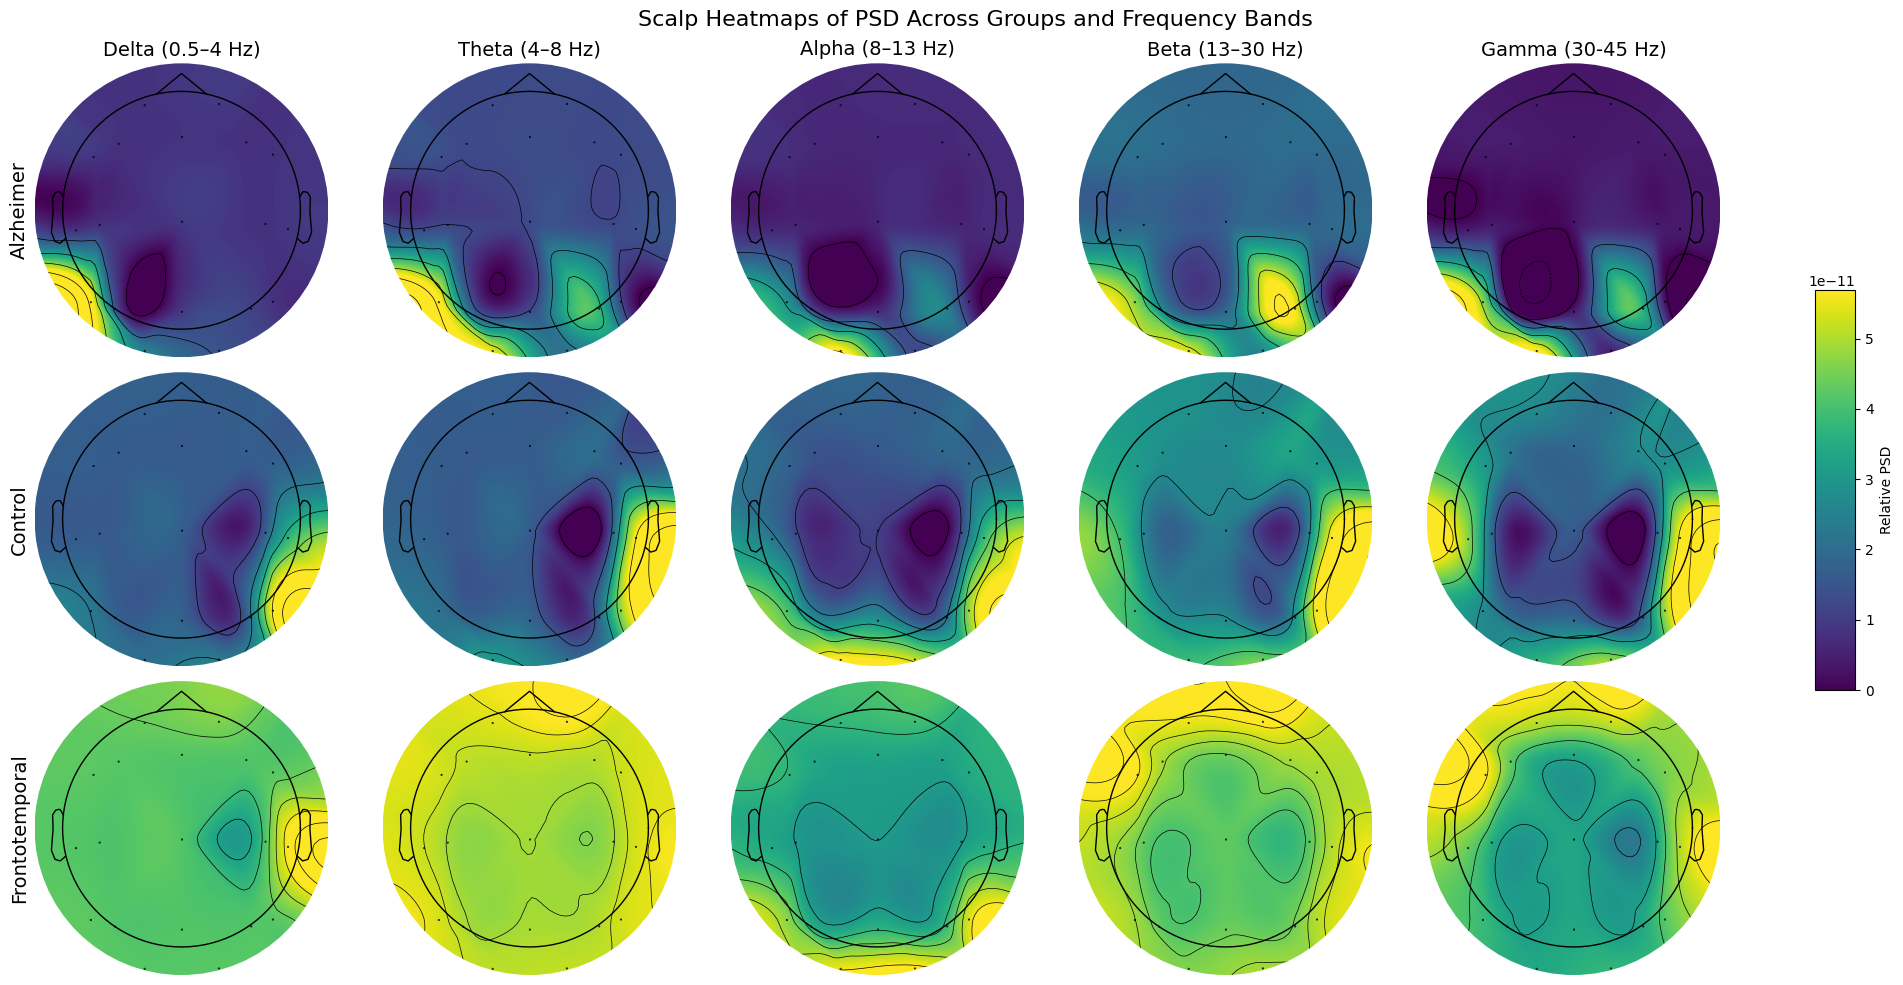

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mne.viz import plot_topomap
from mne.channels import make_standard_montage

# Load data
alz_data = pd.read_csv('/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/alzhimer/band_power/a_all_bp.csv')
ctrl_data = pd.read_csv('/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/control/band_power/c_all_bp.csv')
ftd_data = pd.read_csv('/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/frontotemporal/band_power/f_all_bp.csv')


# Rename 'Unnamed: 0' to 'Channel' for consistency
for df in [alz_data, ctrl_data, ftd_data]:
    df.rename(columns={"Unnamed: 0": "Channel"}, inplace=True)

# Add group labels
alz_data['Group'] = 'Alzheimer'
ctrl_data['Group'] = 'Control'
ftd_data['Group'] = 'Frontotemporal'

# Combine all data into one DataFrame
all_data = pd.concat([alz_data, ctrl_data, ftd_data], ignore_index=True)

# Function to plot topomaps
def plot_grouped_topomaps(data: pd.DataFrame, group_col: str, channel_col: str, value_cols: list[str], montage_name: str = "standard_1020"):
    """
    Plot topographic heatmaps for multiple groups and metrics (e.g., frequency bands).

    Args:
        data (pd.DataFrame): The input data containing groups, channels, and metric values.
        group_col (str): Column name representing the groups (e.g., 'Group').
        channel_col (str): Column name representing channel names (e.g., 'Channel').
        value_cols (list[str]): List of column names for metrics to visualize (e.g., frequency bands).
        montage_name (str): Name of the montage for channel positions (default: 'standard_1020').
    """
    # Assign a standard montage to get channel positions
    montage = make_standard_montage(montage_name)
    positions = montage.get_positions()["ch_pos"]

    # Get unique groups and metrics
    groups = data[group_col].unique()

    # Plotting configuration
    fig, axes = plt.subplots(len(groups), len(value_cols), figsize=(20, 10))

    for i, group in enumerate(groups):
        group_data = data[data[group_col] == group]
        for j, metric in enumerate(value_cols):
            # Get channel positions and metric values
            channels = group_data[channel_col].values
            values = group_data[metric].values
            channel_positions = np.array([positions[ch][:2] for ch in channels if ch in positions])

            # Plot topomap
            ax = axes[i, j]
            im, _ = plot_topomap(values, channel_positions, axes=ax, show=False, cmap="viridis")

            # Set titles and labels
            if i == 0:
                ax.set_title(metric, fontsize=14)
            if j == 0:
                ax.set_ylabel(group, fontsize=14)

    # Add a shared colorbar
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical", label="Relative PSD")
    plt.suptitle("Scalp Heatmaps of PSD Across Groups and Frequency Bands", fontsize=16)
    plt.tight_layout(rect=[0, 0, 0.9, 1])
    plt.show()

# Columns corresponding to frequency bands
frequency_bands = ["Delta (0.5–4 Hz)", "Theta (4–8 Hz)", "Alpha (8–13 Hz)", "Beta (13–30 Hz)", "Gamma (30-45 Hz)"]

# Plot the topomaps
plot_grouped_topomaps(
    data=all_data,
    group_col="Group",
    channel_col="Channel",
    value_cols=frequency_bands
)

C:\Users\Shir Zivav\AppData\Local\Temp\ipykernel_1920\3571075417.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


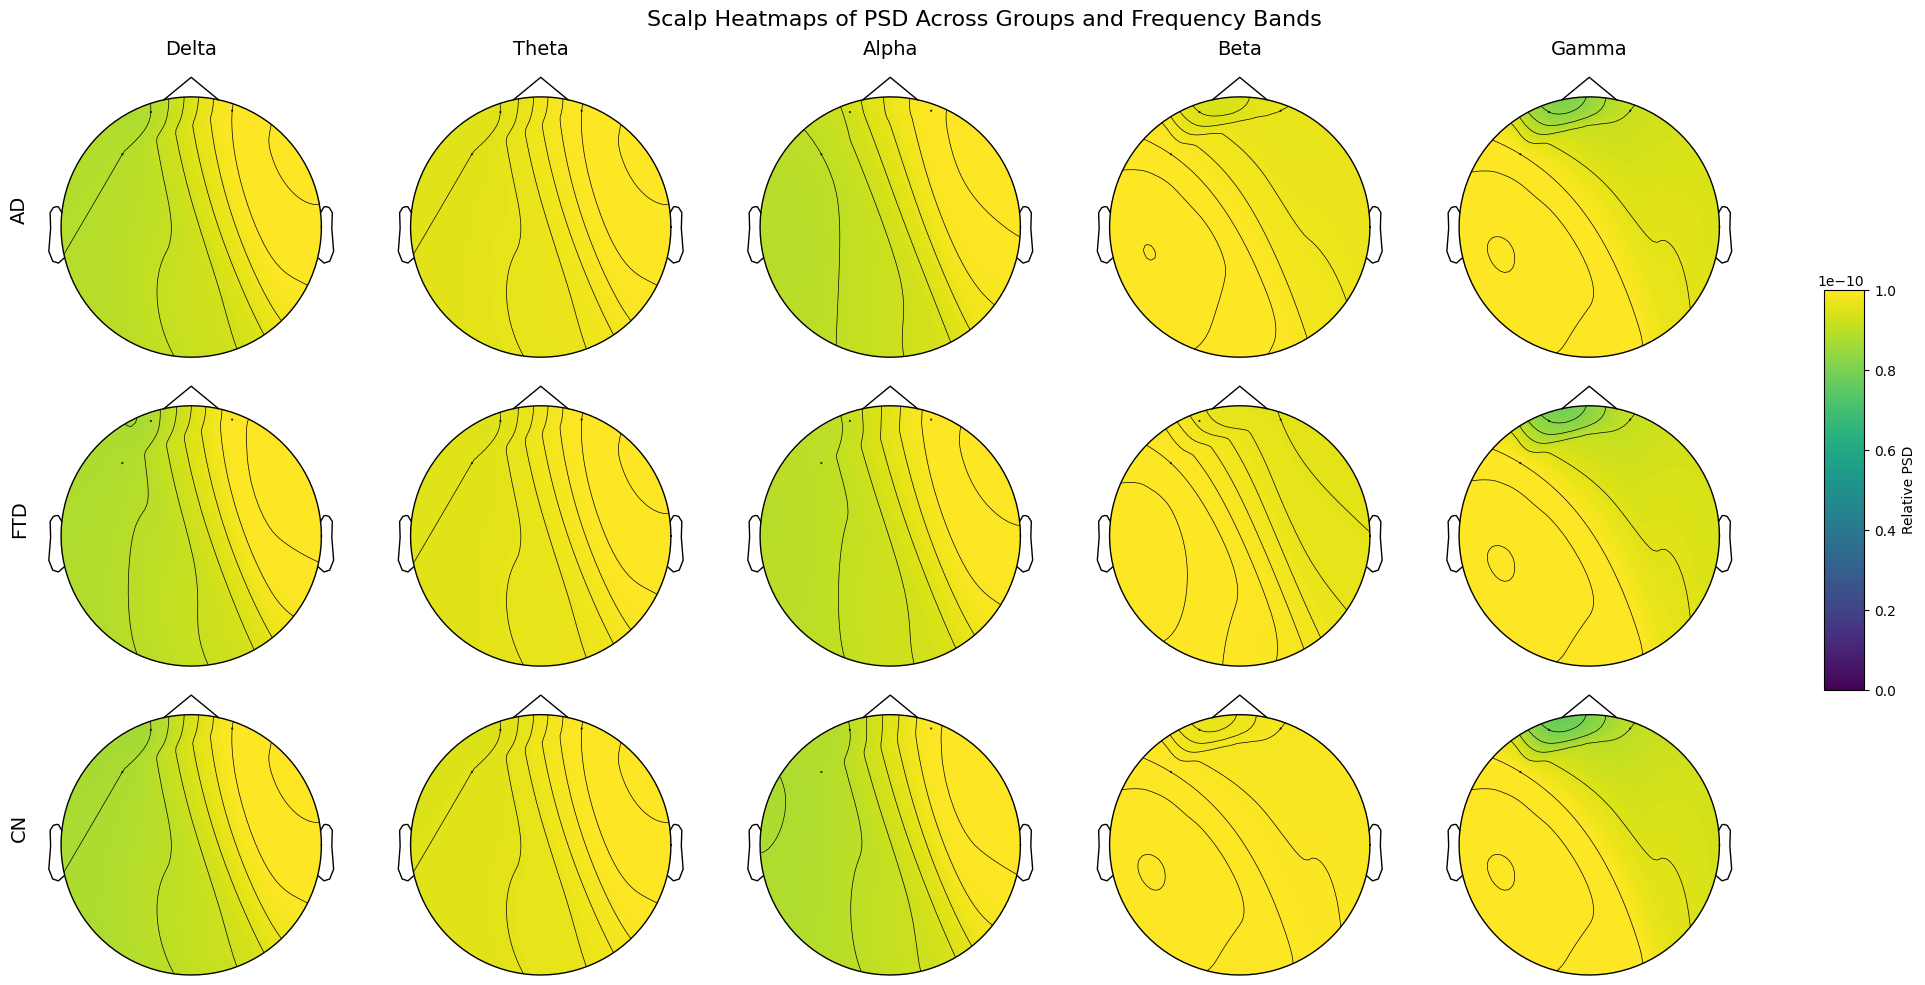

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mne.viz import plot_topomap
from mne.channels import make_standard_montage
from io import StringIO  # Import StringIO for handling string input

# Example: Simulated data for three groups (replace with real data)
data = """
Channel,Group,Delta,Theta,Alpha,Beta,Gamma
Fp1,AD,1.6e-08,2.1e-09,6.8e-10,7.7e-10,1.0e-10
Fp2,AD,1.8e-08,2.2e-09,7.3e-10,7.8e-10,1.1e-10
F3,AD,1.6e-08,2.1e-09,6.6e-10,8.1e-10,1.2e-10
Fp1,FTD,1.5e-08,2.0e-09,6.5e-10,7.3e-10,0.9e-10
Fp2,FTD,1.7e-08,2.1e-09,7.1e-10,7.2e-10,1.0e-10
F3,FTD,1.5e-08,2.0e-09,6.4e-10,7.5e-10,1.1e-10
Fp1,CN,1.4e-08,1.9e-09,6.3e-10,7.0e-10,0.8e-10
Fp2,CN,1.6e-08,2.0e-09,7.0e-10,7.1e-10,0.9e-10
F3,CN,1.4e-08,1.9e-09,6.2e-10,7.2e-10,1.0e-10
"""

# Read the data into a pandas DataFrame
df = pd.read_csv(StringIO(data))

# Assign a standard montage to get channel positions
montage = make_standard_montage("standard_1020")
positions = montage.get_positions()["ch_pos"]

# Groups and frequency bands
groups = df["Group"].unique()
freq_bands = ["Delta", "Theta", "Alpha", "Beta", "Gamma"]

# Plotting configuration
fig, axes = plt.subplots(len(groups), len(freq_bands), figsize=(20, 10))

# Iterate over groups and frequency bands
for i, group in enumerate(groups):
    group_data = df[df["Group"] == group]
    for j, band in enumerate(freq_bands):
        # Get channel positions and average PSD values for the group
        channels = group_data["Channel"].values
        values = group_data[band].values
        channel_positions = np.array([positions[ch][:2] for ch in channels if ch in positions])

        # Create a heatmap
        ax = axes[i, j]
        im, _ = plot_topomap(values, channel_positions, axes=ax, show=False, cmap="viridis")

        # Set title and labels
        if i == 0:
            ax.set_title(band, fontsize=14)
        if j == 0:
            ax.set_ylabel(group, fontsize=14)

# Add a shared colorbar
cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])  # Position for the colorbar
fig.colorbar(im, cax=cbar_ax, orientation="vertical", label="Relative PSD")
plt.suptitle("Scalp Heatmaps of PSD Across Groups and Frequency Bands", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()
